In [2]:
# Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 14.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 491kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.83MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.08MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



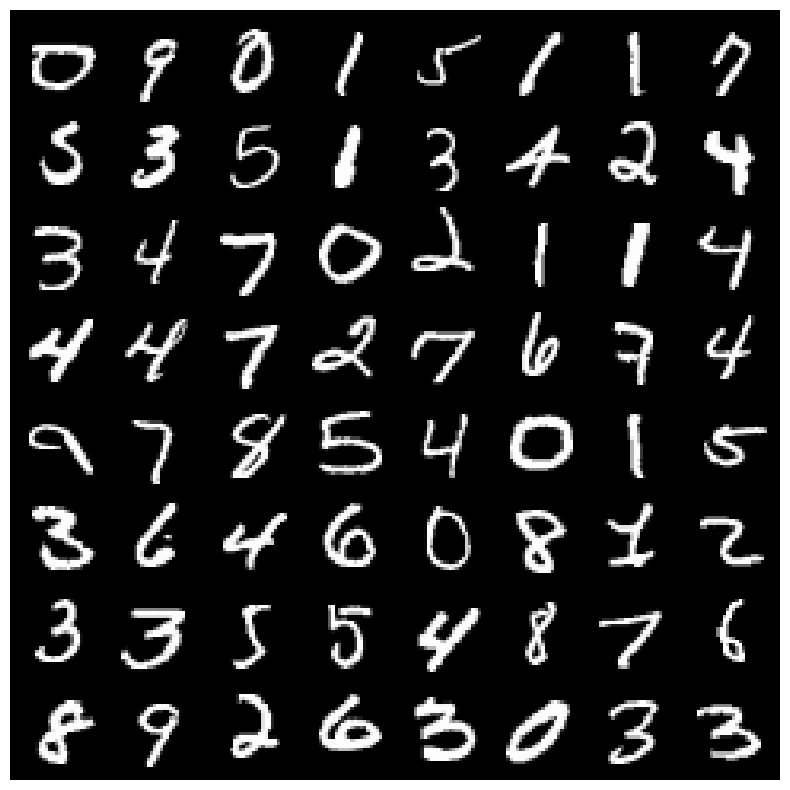

In [3]:
# Define data transformations and load dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

# Load MNIST dataset
dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Visualize some training images
def show_images(images, nrow=8):
    images = (images + 1) / 2.0  # De-normalize
    grid = make_grid(images, nrow=nrow)
    plt.figure(figsize=(10, 10))
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.axis('off')
    plt.show()

# Get a batch of images
dataiter = iter(dataloader)
images, _ = next(dataiter)  # Use the next() function
show_images(images[:64])



In [4]:
# Generator Network
class Generator(nn.Module):
    def __init__(self, noise_dim=100):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28*28),
            nn.Tanh()  # Output range [-1, 1]
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Output range [0, 1]
        )

    def forward(self, x):
        return self.model(x.view(-1, 28*28))


In [5]:
# Hyperparameters
noise_dim = 100
lr = 0.0002
epochs = 50

# Initialize models
G = Generator(noise_dim)
D = Discriminator()

# Optimizers
optimizer_G = optim.Adam(G.parameters(), lr=lr)
optimizer_D = optim.Adam(D.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss()


Epoch [1/50] | D Loss: 0.0653 | G Loss: 5.6283
Epoch [2/50] | D Loss: 0.0108 | G Loss: 9.0666
Epoch [3/50] | D Loss: 0.2156 | G Loss: 12.8093
Epoch [4/50] | D Loss: 0.7510 | G Loss: 2.5985
Epoch [5/50] | D Loss: 1.9064 | G Loss: 1.1171
Epoch [6/50] | D Loss: 1.7591 | G Loss: 2.7206
Epoch [7/50] | D Loss: 1.3926 | G Loss: 3.1883
Epoch [8/50] | D Loss: 0.8210 | G Loss: 1.6269
Epoch [9/50] | D Loss: 0.6040 | G Loss: 2.0169
Epoch [10/50] | D Loss: 0.3319 | G Loss: 3.3446


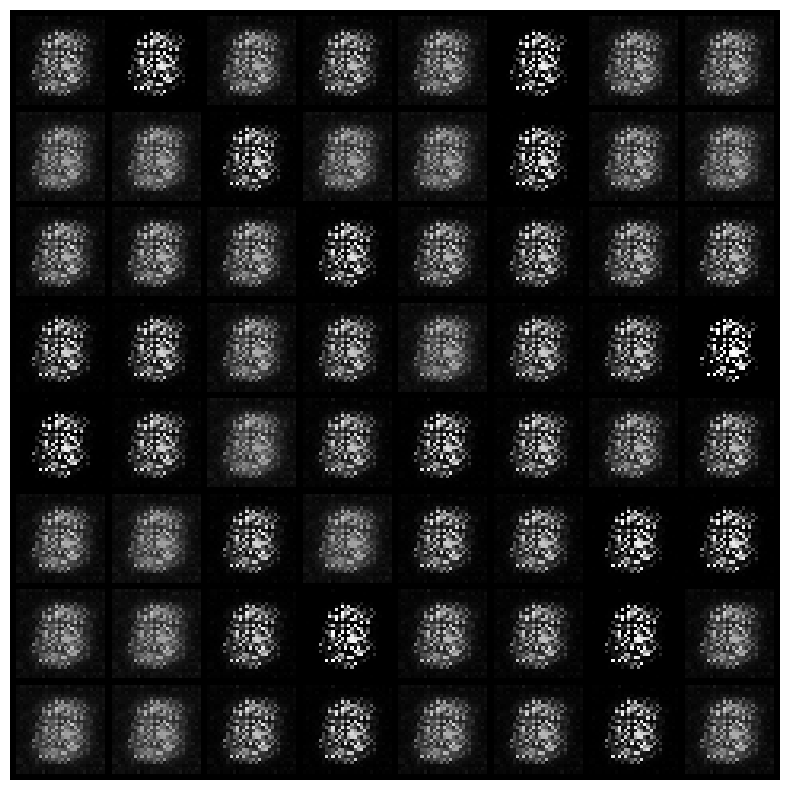

Epoch [11/50] | D Loss: 0.3152 | G Loss: 3.2741
Epoch [12/50] | D Loss: 1.5248 | G Loss: 2.3864
Epoch [13/50] | D Loss: 0.6464 | G Loss: 2.9810
Epoch [14/50] | D Loss: 0.5492 | G Loss: 4.8173
Epoch [15/50] | D Loss: 0.1781 | G Loss: 4.8934
Epoch [16/50] | D Loss: 0.1412 | G Loss: 5.2364
Epoch [17/50] | D Loss: 0.2222 | G Loss: 4.9301
Epoch [18/50] | D Loss: 0.2352 | G Loss: 4.3929
Epoch [19/50] | D Loss: 0.4044 | G Loss: 4.4413
Epoch [20/50] | D Loss: 0.1272 | G Loss: 5.3806


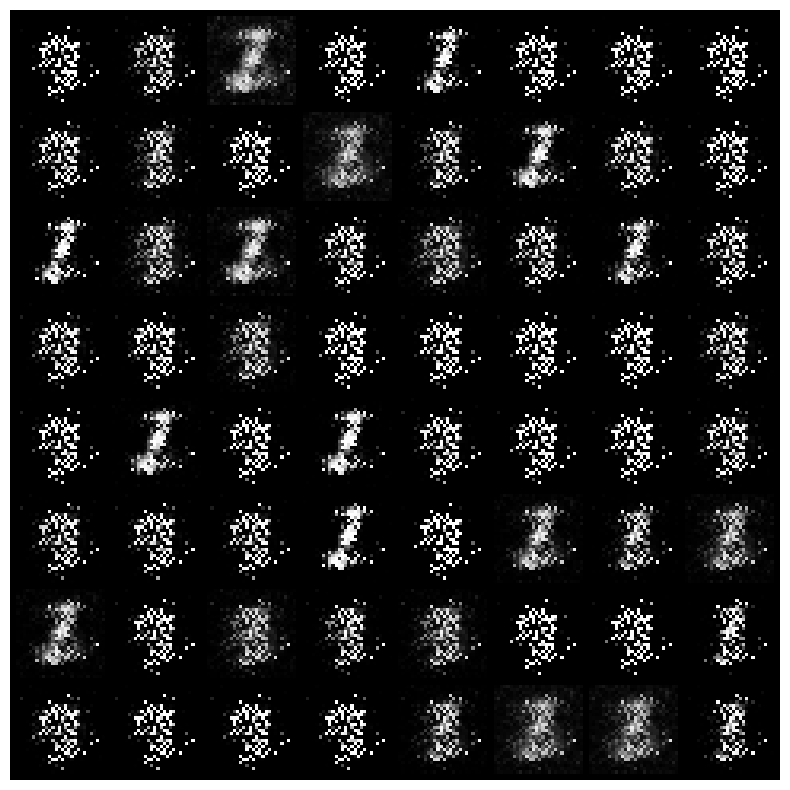

Epoch [21/50] | D Loss: 0.2802 | G Loss: 6.0509
Epoch [22/50] | D Loss: 0.3593 | G Loss: 4.8046
Epoch [23/50] | D Loss: 0.1652 | G Loss: 4.9596
Epoch [24/50] | D Loss: 0.2252 | G Loss: 3.9421
Epoch [25/50] | D Loss: 0.3291 | G Loss: 3.3620
Epoch [26/50] | D Loss: 0.6143 | G Loss: 3.0182
Epoch [27/50] | D Loss: 0.4858 | G Loss: 2.8317
Epoch [28/50] | D Loss: 0.9296 | G Loss: 2.9671
Epoch [29/50] | D Loss: 0.7665 | G Loss: 2.9108
Epoch [30/50] | D Loss: 0.5701 | G Loss: 2.0384


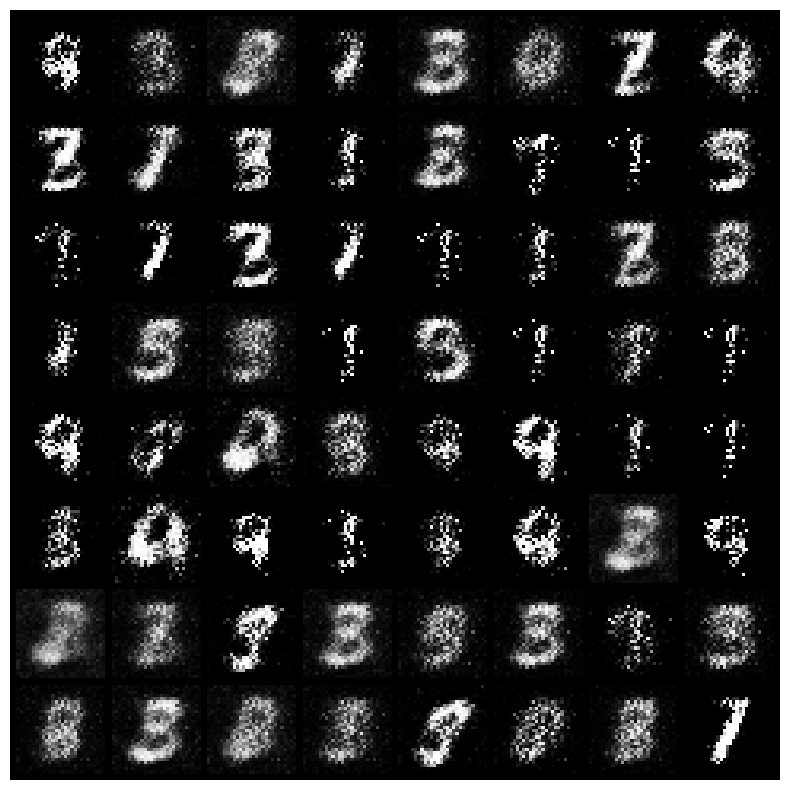

Epoch [31/50] | D Loss: 0.3529 | G Loss: 3.1369
Epoch [32/50] | D Loss: 0.2650 | G Loss: 4.0997
Epoch [33/50] | D Loss: 0.4252 | G Loss: 4.3343
Epoch [34/50] | D Loss: 0.4157 | G Loss: 4.4609
Epoch [35/50] | D Loss: 0.6264 | G Loss: 3.5742
Epoch [36/50] | D Loss: 0.4571 | G Loss: 3.3909
Epoch [37/50] | D Loss: 0.3889 | G Loss: 4.8001
Epoch [38/50] | D Loss: 0.6572 | G Loss: 2.4187
Epoch [39/50] | D Loss: 0.9363 | G Loss: 2.3825
Epoch [40/50] | D Loss: 0.6232 | G Loss: 2.3911


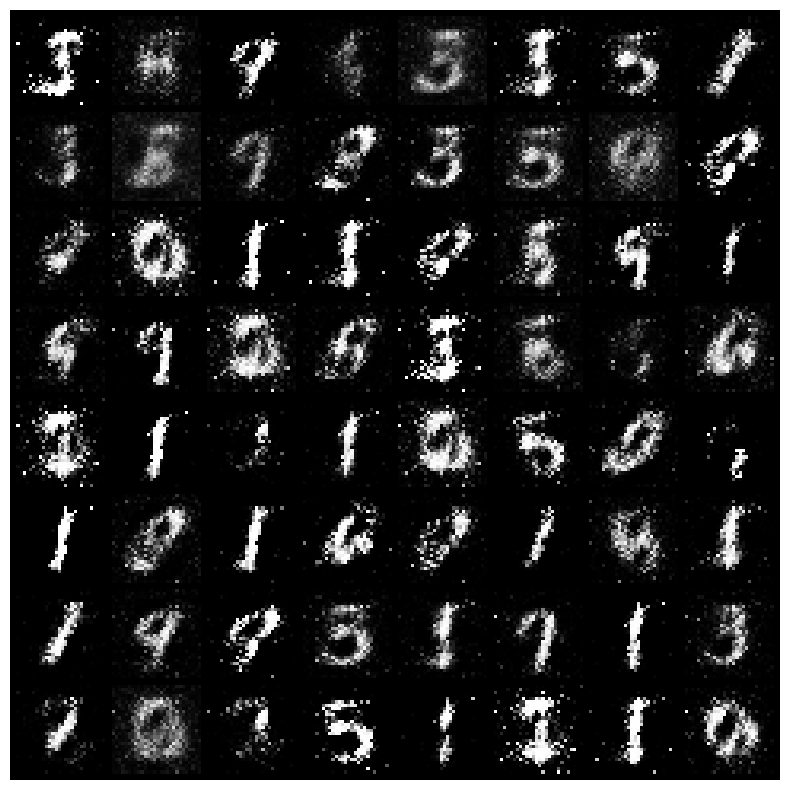

Epoch [41/50] | D Loss: 0.4100 | G Loss: 2.7620
Epoch [42/50] | D Loss: 0.6062 | G Loss: 2.5436
Epoch [43/50] | D Loss: 0.5884 | G Loss: 2.9098
Epoch [44/50] | D Loss: 0.9260 | G Loss: 2.7046
Epoch [45/50] | D Loss: 0.7494 | G Loss: 2.5740
Epoch [46/50] | D Loss: 0.4251 | G Loss: 3.3461
Epoch [47/50] | D Loss: 0.4216 | G Loss: 3.2376
Epoch [48/50] | D Loss: 0.5054 | G Loss: 3.5848
Epoch [49/50] | D Loss: 0.6779 | G Loss: 2.1959
Epoch [50/50] | D Loss: 0.5344 | G Loss: 2.6468


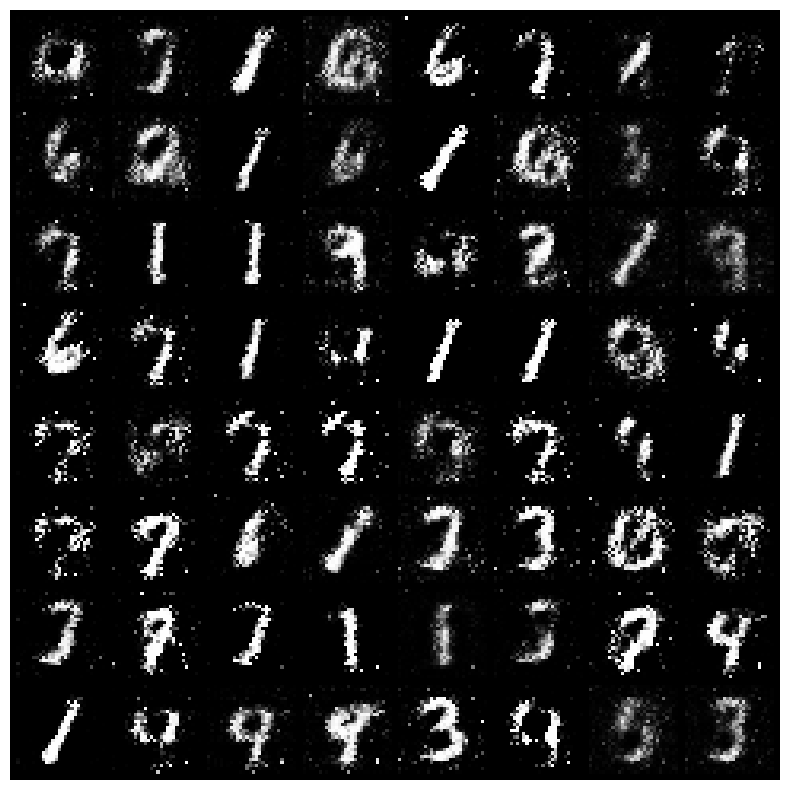

In [6]:
# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G.to(device)
D.to(device)

for epoch in range(epochs):
    for i, (real_images, _) in enumerate(dataloader):
        # Train Discriminator
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # Labels
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Discriminator Loss
        outputs = D(real_images)
        d_loss_real = criterion(outputs, real_labels)

        # Fake images
        z = torch.randn(batch_size, noise_dim).to(device)
        fake_images = G(z)
        outputs = D(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        z = torch.randn(batch_size, noise_dim).to(device)
        fake_images = G(z)
        outputs = D(fake_images)

        g_loss = criterion(outputs, real_labels)
        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    # Log progress
    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    # Save and visualize generated images every 10 epochs
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            fake_images = G(torch.randn(64, noise_dim).to(device))
            show_images(fake_images)
